#IMPORTS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#PREFERERENCES

#HELPER FUNCTIONS

## 1. EDA

In [2]:


df = pd.read_csv("https://raw.githubusercontent.com/datasets/house-prices-us/refs/heads/main/data/cities-month-NSA.csv")

print(df.head())
print(df.info())

         Date  AZ-Phoenix  CA-Los Angeles  CA-San Diego  CA-San Francisco  \
0  1987-01-01      41.055          50.196        53.531            63.388   
1  1987-02-01      41.283          49.958        53.499            63.936   
2  1987-03-01      41.057          50.146        53.680            64.171   
3  1987-04-01      40.962          50.554        53.754            64.813   
4  1987-05-01      41.243          50.625        54.714            65.182   

   CO-Denver  DC-Washington  FL-Miami  FL-Tampa  GA-Atlanta  ...  \
0     77.334         64.115    53.546    63.129      46.613  ...   
1     77.933         64.775    54.640    62.811      46.868  ...   
2     77.761         65.712    54.802    62.432      47.320  ...   
3     77.556         66.396    54.880    63.031      47.693  ...   
4     77.849         67.268    55.426    63.314      48.315  ...   

   NC-Charlotte  NV-Las Vegas  NY-New York  OH-Cleveland  OR-Portland  \
0        67.544           0.0      100.000        54.66

## 2. Data Cleaning


In [3]:
null_values = df.isnull()
print(null_values)

null_counts = df.isnull().sum()
print(null_counts)

      Date  AZ-Phoenix  CA-Los Angeles  CA-San Diego  CA-San Francisco  \
0    False       False           False         False             False   
1    False       False           False         False             False   
2    False       False           False         False             False   
3    False       False           False         False             False   
4    False       False           False         False             False   
..     ...         ...             ...           ...               ...   
290  False       False           False         False             False   
291  False       False           False         False             False   
292  False       False           False         False             False   
293  False       False           False         False             False   
294  False       False           False         False             False   

     CO-Denver  DC-Washington  FL-Miami  FL-Tampa  GA-Atlanta  ...  \
0        False          False     False  

In [4]:
df.shape

(295, 24)

In [5]:
df["MN-Minneapolis"].head(145)

,MN-Minneapolis
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
140,NaN
141,NaN
142,NaN
143,NaN


In [6]:
df.drop(columns=['MN-Minneapolis','NV-Las Vegas'], inplace=True)


print(df.head())
print(df.shape)

null_counts = df.isnull().sum()
print(null_counts)

         Date  AZ-Phoenix  CA-Los Angeles  CA-San Diego  CA-San Francisco  \
0  1987-01-01      41.055          50.196        53.531            63.388   
1  1987-02-01      41.283          49.958        53.499            63.936   
2  1987-03-01      41.057          50.146        53.680            64.171   
3  1987-04-01      40.962          50.554        53.754            64.813   
4  1987-05-01      41.243          50.625        54.714            65.182   

   CO-Denver  DC-Washington  FL-Miami  FL-Tampa  GA-Atlanta  ...  MI-Detroit  \
0     77.334         64.115    53.546    63.129      46.613  ...      70.042   
1     77.933         64.775    54.640    62.811      46.868  ...      70.084   
2     77.761         65.712    54.802    62.432      47.320  ...      70.003   
3     77.556         66.396    54.880    63.031      47.693  ...      70.698   
4     77.849         67.268    55.426    63.314      48.315  ...      71.510   

   NC-Charlotte  NY-New York  OH-Cleveland  OR-Portland 

In [7]:
duplicates_subset = df.duplicated(subset=['Date'])

# Display duplicate rows based on specific columns
print(df[duplicates_subset])

Empty DataFrame
Columns: [Date, AZ-Phoenix, CA-Los Angeles, CA-San Diego, CA-San Francisco, CO-Denver, DC-Washington, FL-Miami, FL-Tampa, GA-Atlanta, IL-Chicago, MA-Boston, MI-Detroit, NC-Charlotte, NY-New York, OH-Cleveland, OR-Portland, TX-Dallas, WA-Seattle, Composite-10, Composite-20, National-US]
Index: []

[0 rows x 22 columns]


## 3. Data Visualization

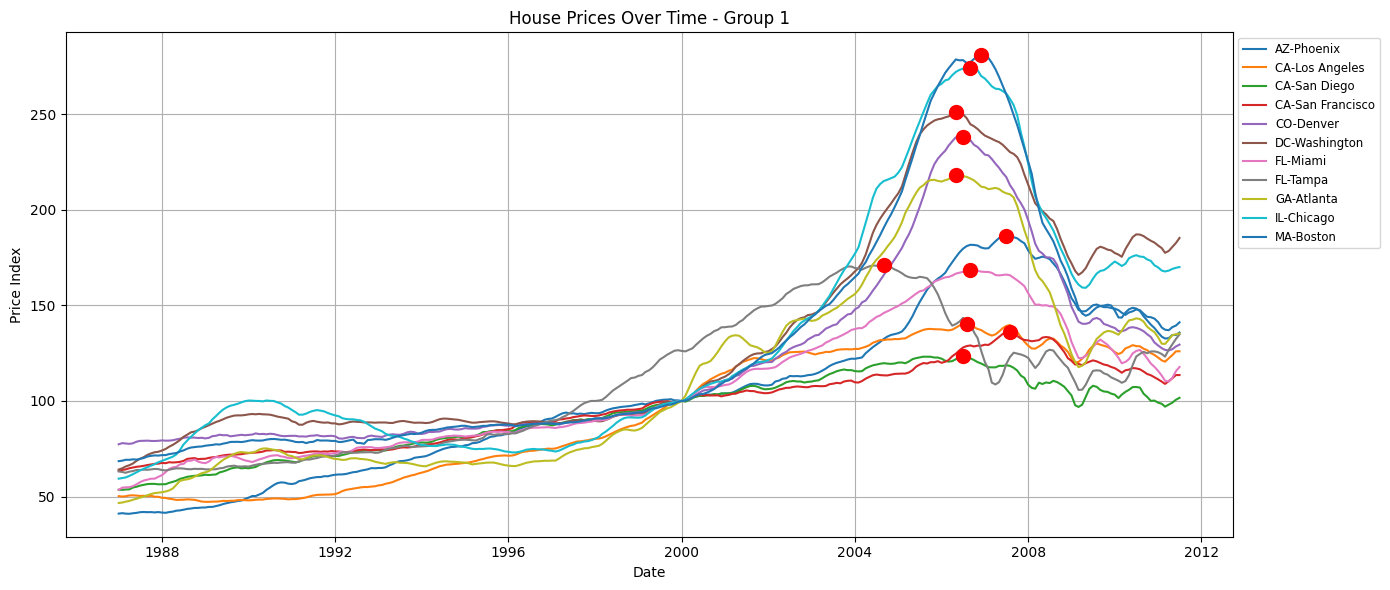

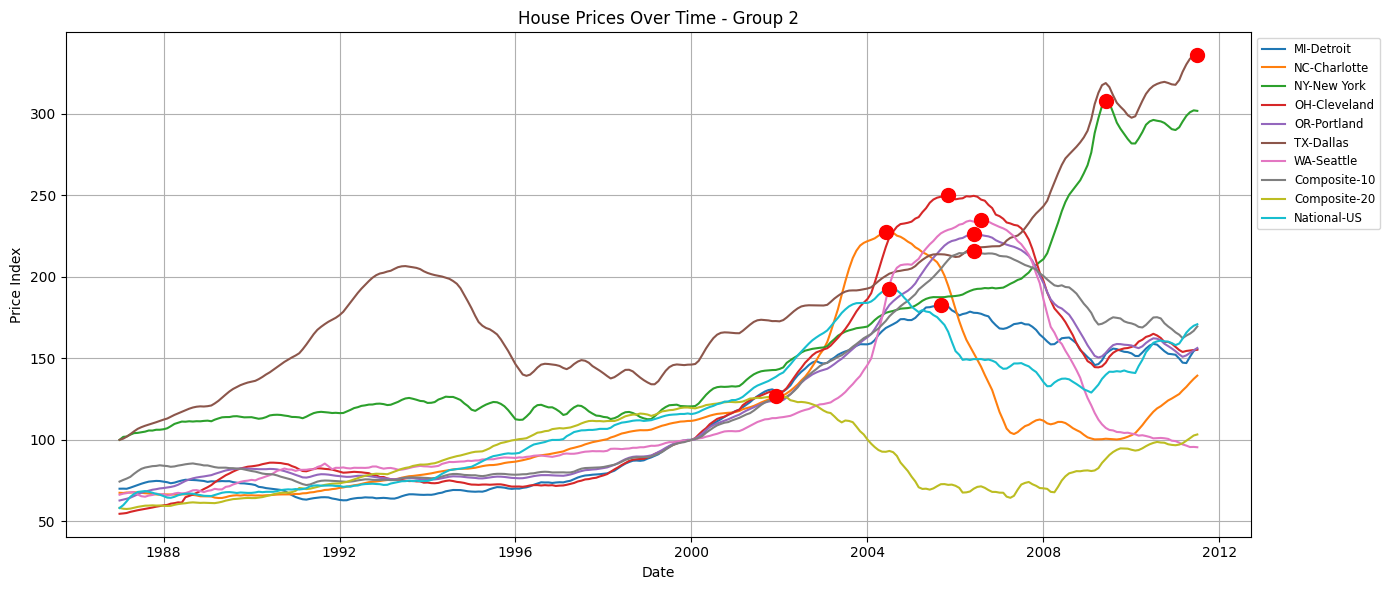

In [8]:


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define subsets of cities
cities_subset1 = ['AZ-Phoenix', 'CA-Los Angeles', 'CA-San Diego', 'CA-San Francisco',
                  'CO-Denver', 'DC-Washington', 'FL-Miami', 'FL-Tampa',
                  'GA-Atlanta', 'IL-Chicago', 'MA-Boston']
cities_subset2 = ['MI-Detroit', 'NC-Charlotte',  'NY-New York',
                  'OH-Cleveland', 'OR-Portland', 'TX-Dallas', 'WA-Seattle',
                  'Composite-10', 'Composite-20', 'National-US']

# Create a colormap with distinct colors
colors = plt.cm.tab10.colors  # This provides 10 distinct colors

# Function to plot house prices and highlight max prices without setting index
def plot_house_prices_with_highlight(df, cities, group_title):
    plt.figure(figsize=(14, 6))
    for i, city in enumerate(cities):
        plt.plot(df['Date'], df[city], label=city, color=colors[i % len(colors)])  # Plot city prices

        # Find and highlight the max price
        max_price_index = df['Date'][df[city].idxmax()]  # Get the date of max price
        max_price_value = df[city].max()  # Get max price value

        plt.scatter(max_price_index, max_price_value, color='red', s=100, zorder=5)  # Highlight max price

    plt.title(f'House Prices Over Time - {group_title}')
    plt.xlabel('Date')
    plt.ylabel('Price Index')
    plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
    plt.grid()
    plt.tight_layout()  # Adjust layout
    plt.show()

# Plot for both subsets with highlights
plot_house_prices_with_highlight(df, cities_subset1, 'Group 1')
plot_house_prices_with_highlight(df, cities_subset2, 'Group 2')




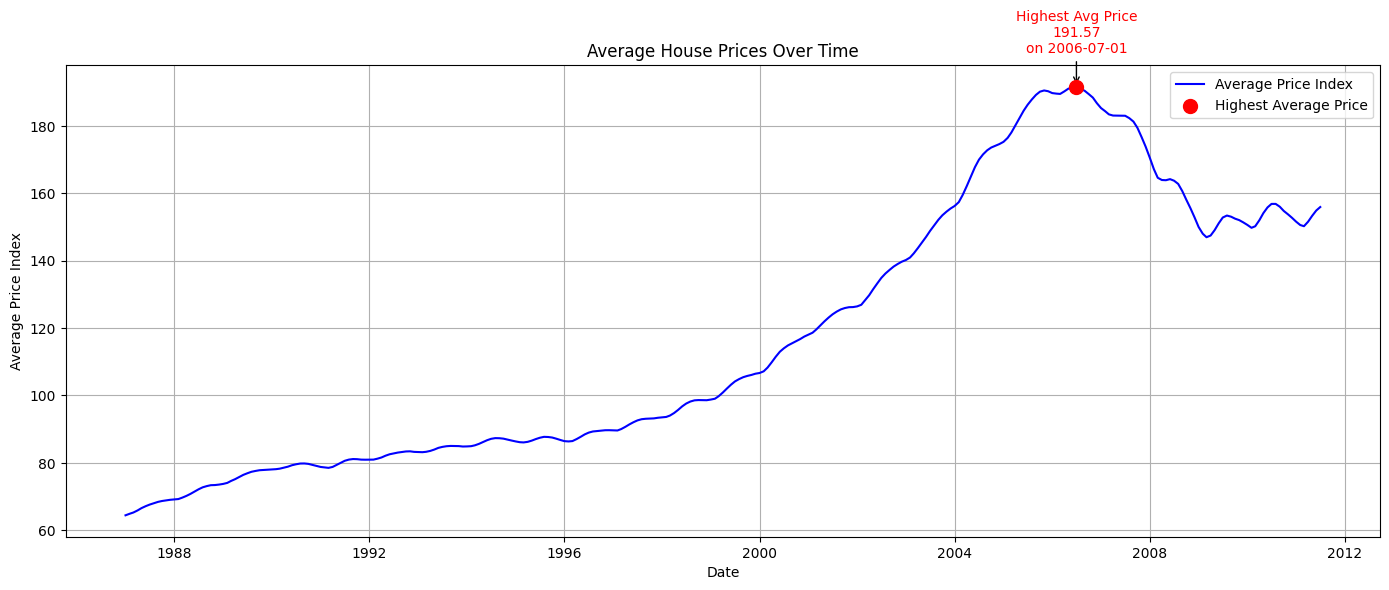

In [9]:


# Calculate the average price for each date across all cities, excluding the 'Date' column
average_prices = df.drop(columns=['Date']).mean(axis=1)

# Create a DataFrame for dates and their corresponding average prices
average_prices_df = pd.DataFrame({'Date': df['Date'], 'Average_Price': average_prices})

# Find the date with the highest average price
highest_avg_price_index = average_prices_df['Average_Price'].idxmax()
highest_avg_price_date = average_prices_df.loc[highest_avg_price_index, 'Date']
highest_avg_price_value = average_prices_df['Average_Price'].max()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(average_prices_df['Date'], average_prices_df['Average_Price'], label='Average Price Index', color='blue')  # Plot average prices

# Highlight the date with the highest average price
plt.scatter(highest_avg_price_date, highest_avg_price_value, color='red', s=100, zorder=5, label='Highest Average Price')

# Add annotations
plt.annotate(f'Highest Avg Price\n{highest_avg_price_value:.2f}\non {highest_avg_price_date.date()}',
             xy=(highest_avg_price_date, highest_avg_price_value),
             xytext=(highest_avg_price_date, highest_avg_price_value + 10),  # Adjust text position
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red', ha='center')

# Customize plot
plt.title('Average House Prices Over Time')
plt.ylabel('Average Price Index')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout
plt.show()


## 4. Model Development

In [10]:
# Calculate the average across columns, excluding the 'Date' column
df['Average_Price'] = df.drop(columns=['Date']).mean(axis=1)

df

,Date,AZ-Phoenix,CA-Los Angeles,CA-San Diego,CA-San Francisco,CO-Denver,DC-Washington,FL-Miami,FL-Tampa,GA-Atlanta,...,NC-Charlotte,NY-New York,OH-Cleveland,OR-Portland,TX-Dallas,WA-Seattle,Composite-10,Composite-20,National-US,Average_Price
0,1987-01-01,41.055,50.196,53.531,63.388,77.334,64.115,53.546,63.129,46.613,...,67.544,100.000,54.668,62.824,100.000,66.358,74.422,58.244,58.233,64.432000
1,1987-02-01,41.283,49.958,53.499,63.936,77.933,64.775,54.640,62.811,46.868,...,67.429,101.823,54.891,63.386,100.757,67.030,75.426,57.763,59.977,64.889476
2,1987-03-01,41.057,50.146,53.680,64.171,77.761,65.712,54.802,62.432,47.320,...,67.711,102.037,55.162,63.874,101.945,67.335,76.250,57.629,62.294,65.263714
3,1987-04-01,40.962,50.554,53.754,64.813,77.556,66.396,54.880,63.031,47.693,...,67.654,103.201,55.854,64.568,103.501,67.882,77.338,57.850,65.092,65.870571
4,1987-05-01,41.243,50.625,54.714,65.182,77.849,67.268,55.426,63.314,48.315,...,67.898,104.114,56.351,65.565,105.197,67.899,79.162,58.364,66.825,66.569000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2011-03-01,132.666,120.555,97.023,108.920,126.704,177.516,110.570,123.202,129.829,...,130.286,295.122,153.881,150.912,325.618,97.176,162.336,97.900,162.050,150.220190
291,2011-04-01,132.844,122.321,98.101,110.353,126.426,178.485,110.122,126.806,132.019,...,132.465,298.590,154.500,151.781,330.161,96.469,163.917,99.443,165.719,151.559905
292,2011-05-01,134.504,123.944,99.101,111.846,127.063,180.565,112.009,129.535,134.422,...,134.965,300.835,154.779,153.329,333.632,95.597,165.092,100.991,168.101,153.279905
293,2011-06-01,134.516,125.974,100.650,113.555,128.516,182.670,115.606,132.454,134.901,...,137.356,301.996,155.064,154.865,335.646,95.671,166.818,102.659,169.937,154.877667


In [11]:


# Convert 'Date' column to a numerical format (e.g., days since the minimum date)
df['Date_numeric'] = (df['Date'] - df['Date'].min()).dt.days

# Prepare the data
X = df[['Date_numeric']]  # Use 'Date_numeric' as the feature
y = df['Average_Price']   # Keep 'Average_Price' as the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {

    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),

}


# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert R² to percentage
    r2_percentage = r2 * 100

    # Print results
    print(f"{model_name}:")
    print(f" - Mean Squared Error: {mse:.2f}")
    print(f" - Mean Absolute Error: {mae:.2f}")
    print(f" - R² Score: {r2_percentage:.2f}%")  # Convert R² to percentage

    # Check if R² score meets the performance requirement
    print(" ")

Decision Tree:
 - Mean Squared Error: 0.93
 - Mean Absolute Error: 0.68
 - R² Score: 99.94%
 
Random Forest:
 - Mean Squared Error: 0.29
 - Mean Absolute Error: 0.35
 - R² Score: 99.98%
 
XGBoost:
 - Mean Squared Error: 1.18
 - Mean Absolute Error: 0.71
 - R² Score: 99.92%
 
Gradient Boosting:
 - Mean Squared Error: 0.88
 - Mean Absolute Error: 0.65
 - R² Score: 99.94%
 
AdaBoost:
 - Mean Squared Error: 13.73
 - Mean Absolute Error: 2.75
 - R² Score: 99.12%
 
Support Vector Regressor:
 - Mean Squared Error: 163.17
 - Mean Absolute Error: 7.45
 - R² Score: 89.59%
 
K-Neighbors Regressor:
 - Mean Squared Error: 0.68
 - Mean Absolute Error: 0.65
 - R² Score: 99.96%
 


## 5. Model Evaluation


In [12]:
# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert R² to percentage
    r2_percentage = r2 * 100

    # Print results
    print(f"{model_name}:")
    print(f" - Mean Squared Error: {mse:.2f}")
    print(f" - Mean Absolute Error: {mae:.2f}")
    print(f" - R² Score: {r2_percentage:.2f}%")  # Convert R² to percentage

    # Check if R² score meets the performance requirement
    print(" ")

Decision Tree:
 - Mean Squared Error: 0.93
 - Mean Absolute Error: 0.68
 - R² Score: 99.94%
 
Random Forest:
 - Mean Squared Error: 0.31
 - Mean Absolute Error: 0.37
 - R² Score: 99.98%
 
XGBoost:
 - Mean Squared Error: 1.18
 - Mean Absolute Error: 0.71
 - R² Score: 99.92%
 
Gradient Boosting:
 - Mean Squared Error: 0.88
 - Mean Absolute Error: 0.65
 - R² Score: 99.94%
 
AdaBoost:
 - Mean Squared Error: 17.07
 - Mean Absolute Error: 3.29
 - R² Score: 98.91%
 
Support Vector Regressor:
 - Mean Squared Error: 163.17
 - Mean Absolute Error: 7.45
 - R² Score: 89.59%
 
K-Neighbors Regressor:
 - Mean Squared Error: 0.68
 - Mean Absolute Error: 0.65
 - R² Score: 99.96%
 


##6. Documentation

# House Prices Analysis and Prediction

## Dataset Description
The dataset used in this project is sourced from [House Prices in the US](https://raw.githubusercontent.com/datasets/house-prices-us/refs/heads/main/data/cities-month-NSA.csv). It contains monthly housing price index data for various cities in the United States, spanning multiple years.

## Summary of Findings
Through exploratory data analysis and visualization, key insights about the trends in housing prices across different cities were uncovered. Notably, the average house prices have shown significant variation over time, with certain cities experiencing peak prices at specific intervals.

## Data Preprocessing
1. **Null Value Handling**:
   - The dataset was examined for null values, and the `MN-Minneapolis` and `NV-Las Vegas` columns were dropped due to missing data.
   - I checked the data under the column `MN-Minneapolis` and half of it was null so I decided to drop the whole column, on the other hand `NV-Las Vegas` had many 0 values from the start so I decided to remove it since that would count as if it was free and it would ruin the predictive model I am trying t o build.
2. **Duplicate Records**:
   - Duplicate records based on the `Date` column were identified and managed, and it turns out there were none, which is a good thing.

## Exploratory Data Analysis
The exploratory data analysis involved:
- Checking the dataset's structure and summary statistics.
- Analyzing the price trends of selected cities over time.

## Visualization
1. **House Prices Over Time**:
   - Two subsets of cities were analyzed, and the maximum prices for each city were highlighted on the plots.
   - The reason I split them into 2 groups is for them to be more visible and the colors don't merge that much for visualization

   **Interpretation**:
   - This visualization shows how housing prices fluctuate in different metropolitan areas, with peaks indicating the most expensive periods.

2. **Average House Prices**:
   - A separate visualization highlighted the date with the highest average house price across all selected cities.
   - I used "df.drop(columns=['Date']).mean(axis=1)" to go and get first the average price for each date across all the cities, date was dropped since it not relevant here.
   - I used "average_prices_df = pd.DataFrame({'Date': df['Date'], 'Average_Price': average_prices})" to create a DataFrame for dates and their corresponding average prices
   - highest_avg_price_index = average_prices_df['Average_Price'].idxmax()  # Finds the index of the highest average price
   - highest_avg_price_date = average_prices_df.loc[highest_avg_price_index, 'Date']  # Gets the date corresponding to that index
   - highest_avg_price_value = average_prices_df['Average_Price'].max()  # Retrieves the highest average price value


   **Interpretation**:
   - The plot indicates overall trends in house prices, revealing periods of growth or decline in the housing market.
   - It also highlights which date has the average house price in the US.

## Model Development
Several regression algorithms were implemented to predict house prices based on the date:

1. **Decision Tree Regressor**
2. **Random Forest Regressor**
3. **XGBoost Regressor**
4. **Gradient Boosting Regressor**
5. **AdaBoost Regressor**
6. **Support Vector Regressor**
7. **K-Neighbors Regressor**

- this were the remaining models since I excluded everything that was below the 85% passing mark for accuracy.

The feature used was a numerical representation of the date, and the target variable was the average house price.

## Model Evaluation
Each model was evaluated based on:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**

Decision Tree:
 - Mean Squared Error: 0.93
 - Mean Absolute Error: 0.68
 - R² Score: 99.94%

Random Forest:
 - Mean Squared Error: 0.33
 - Mean Absolute Error: 0.38
 - R² Score: 99.98%

XGBoost:
 - Mean Squared Error: 1.18
 - Mean Absolute Error: 0.71
 - R² Score: 99.92%

Gradient Boosting:
 - Mean Squared Error: 0.88
 - Mean Absolute Error: 0.65
 - R² Score: 99.94%

AdaBoost:
 - Mean Squared Error: 14.23
 - Mean Absolute Error: 2.87
 - R² Score: 99.09%

Support Vector Regressor:
 - Mean Squared Error: 163.17
 - Mean Absolute Error: 7.45
 - R² Score: 89.59%

K-Neighbors Regressor:
 - Mean Squared Error: 0.68
 - Mean Absolute Error: 0.65
 - R² Score: 99.96%

### Results Summary:
- Models were fitted, and performance metrics were calculated.

**Conclusion:**
In this project, I looked at housing prices in the U.S. over time and used different machine learning models to try to predict future prices based on the trends we found. After cleaning up the data and analyzing it, I saw that housing prices in different cities vary a lot, with certain areas hitting peak prices at different times. The visualizations made it clear how housing prices move in each city, which helps us understand how the market has shifted over the years.

When it came to building predictive models, the Random Forest Regressor and K-Neighbors Regressor stood out as the best performers. Both had really high accuracy (R² scores above 99%) and low error rates, making them reliable for predicting future prices. On the other hand, the Support Vector Regressor didn’t do as well, possibly because it struggled with the non-linear trends in the data.

### Contributors:
CPE-401, Rafael Luis Canlas

